In [1]:
%matplotlib inline
from event import Event, iet
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
import pandas as pd

def do(id=id):
    # e = Event(id=id)
    e = Event(id=id, velocity_model=1750)
    depth = e.depth
    arrival_times = [dates.num2date(t) for t in e.aic_t]
    row = pd.DataFrame({'depth':(depth,)
                        , 'h1_arrival':arrival_times[0]
                        , 'h2_arrival':arrival_times[1]
                        , 'h3_arrival':arrival_times[2]
                        , 'h4_arrival':arrival_times[3]
                        , 'h5_arrival':arrival_times[4]
                        , 'h6_arrival':arrival_times[5]
                       }, index=(id,))
    return row

number of events detected: (1975, 7)


In [2]:
iet.df

,index,event_times (mpl),event_times (abs),hphone_idx,ones,event_times,p_arrival_hphone_idx
0,0,18037.318174,2019-05-21T07:38:10.208000Z,h3,1,2019-05-21 07:38:10.208000+00:00,2019-05-21 07:38:10.186000+00:00
1,1,18037.318189,2019-05-21T07:38:11.526000Z,h3,1,2019-05-21 07:38:11.526000+00:00,2019-05-21 07:38:11.517000+00:00
2,2,18037.318203,2019-05-21T07:38:12.754000Z,h3,1,2019-05-21 07:38:12.754000+00:00,2019-05-21 07:38:12.723000+00:00
3,3,18037.318219,2019-05-21T07:38:14.141000Z,h3,1,2019-05-21 07:38:14.141000+00:00,2019-05-21 07:38:14.107000+00:00
4,4,18037.318222,2019-05-21T07:38:14.405000Z,h3,1,2019-05-21 07:38:14.405000+00:00,2019-05-21 07:38:14.592000+00:00
...,...,...,...,...,...,...,...
1970,300,18037.359564,2019-05-21T08:37:46.291000Z,h6,1,2019-05-21 08:37:46.291000+00:00,2019-05-21 08:37:46.273000+00:00
1971,301,18037.359570,2019-05-21T08:37:46.891000Z,h6,1,2019-05-21 08:37:46.891000+00:00,2019-05-21 08:37:46.868000+00:00
1972,302,18037.359578,2019-05-21T08:37:47.564000Z,h6,1,2019-05-21 08:37:47.564000+00:00,2019-05-21 08:37:47.739000+00:00
1973,303,18037.359589,2019-05-21T08:37:48.513000Z,h6,1,2019-05-21 08:37:48.513000+00:00,2019-05-21 08:37:48.496000+00:00


In [3]:
# e750 = Event(id=750)

# e750.plot(kind='waveforms')

do(id=750)

,depth,h1_arrival,h2_arrival,h3_arrival,h4_arrival,h5_arrival,h6_arrival
750,262.75,2019-05-21 08:05:17.973000+00:00,2019-05-21 08:05:18.031000+00:00,2019-05-21 08:05:18.070000+00:00,2019-05-21 08:05:18.030000+00:00,2019-05-21 08:05:18.044000+00:00,2019-05-21 08:05:18.086000+00:00


In [4]:
# from multiprocessing import Pool
from multiprocess import Pool

pool = Pool(9)

rows = pool.map(do, iet.df.index.values)

pool.close()

In [5]:
df = pd.concat(rows)

In [261]:
# df['h3-h4'] = (df.h3_arrival - df.h4_arrival).total_seconds()
df['h3-h4'] = df.apply(lambda row: (row.h3_arrival - row.h4_arrival).total_seconds(), axis=1)
df['h4-h3'] = df.apply(lambda row: (row.h4_arrival - row.h3_arrival).total_seconds(), axis=1)
df['h4-h5'] = df.apply(lambda row: (row.h4_arrival - row.h5_arrival).total_seconds(), axis=1)
df['h5-h4'] = df.apply(lambda row: (row.h5_arrival - row.h4_arrival).total_seconds(), axis=1)
df['h5-h6'] = df.apply(lambda row: (row.h5_arrival - row.h6_arrival).total_seconds(), axis=1)
df['h6-h5'] = df.apply(lambda row: (row.h6_arrival - row.h5_arrival).total_seconds(), axis=1)

In [262]:
df

,depth,h1_arrival,h2_arrival,h3_arrival,h4_arrival,h5_arrival,h6_arrival,h3-h4,h4-h5,h5-h6,depth2,h4-h3,h5-h4,h6-h5
0,-73.250,2019-05-21 07:38:10.107000+00:00,2019-05-21 07:38:10.046000+00:00,2019-05-21 07:38:10.188000+00:00,2019-05-21 07:38:10.506000+00:00,2019-05-21 07:38:10.506000+00:00,2019-05-21 07:38:10.506000+00:00,-0.318,0.000,0.000,-243.250,0.318,0.000,0.000
1,169.125,2019-05-21 07:38:11.524000+00:00,2019-05-21 07:38:11.495000+00:00,2019-05-21 07:38:11.524000+00:00,2019-05-21 07:38:11.565000+00:00,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,-0.041,0.162,0.000,-0.875,0.041,-0.162,0.000
2,322.250,2019-05-21 07:38:12.736000+00:00,2019-05-21 07:38:12.634000+00:00,2019-05-21 07:38:12.737000+00:00,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.134,0.000,0.000,-82.250,-0.134,0.000,0.000
3,338.000,2019-05-21 07:38:14.011000+00:00,2019-05-21 07:38:14.112000+00:00,2019-05-21 07:38:14.125000+00:00,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.152,0.000,0.000,-98.000,-0.152,0.000,0.000
4,212.875,2019-05-21 07:38:14.326000+00:00,2019-05-21 07:38:14.323000+00:00,2019-05-21 07:38:14.323000+00:00,2019-05-21 07:38:14.314000+00:00,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.009,0.061,0.000,27.125,-0.009,-0.061,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,379.125,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.437000+00:00,2019-05-21 08:37:46.369000+00:00,2019-05-21 08:37:46.328000+00:00,2019-05-21 08:37:46.287000+00:00,0.068,0.041,0.041,-0.875,-0.068,-0.041,-0.041
1971,380.000,2019-05-21 08:37:46.890000+00:00,2019-05-21 08:37:46.890000+00:00,2019-05-21 08:37:47.034000+00:00,2019-05-21 08:37:46.968000+00:00,2019-05-21 08:37:46.927000+00:00,2019-05-21 08:37:46.887000+00:00,0.066,0.041,0.040,0.000,-0.066,-0.041,-0.040
1972,380.000,2019-05-21 08:37:47.862000+00:00,2019-05-21 08:37:47.409000+00:00,2019-05-21 08:37:47.378000+00:00,2019-05-21 08:37:47.642000+00:00,2019-05-21 08:37:47.598000+00:00,2019-05-21 08:37:47.558000+00:00,-0.264,0.044,0.040,0.000,0.264,-0.044,-0.040
1973,380.875,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.658000+00:00,2019-05-21 08:37:48.592000+00:00,2019-05-21 08:37:48.551000+00:00,2019-05-21 08:37:48.512000+00:00,0.066,0.041,0.039,0.875,-0.066,-0.041,-0.039


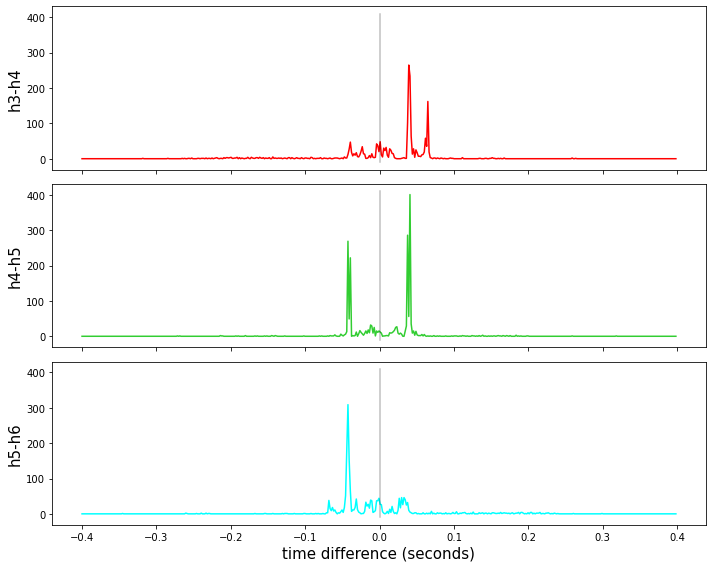

In [263]:
h, e = np.histogram(df['h3-h4'].values, bins=np.linspace(-0.4, 0.4, 500))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

pair = 'h3-h4'
h, e = np.histogram(df[pair].values, bins=np.linspace(-0.4, 0.4, 500))
axes[0].plot(e[:-1], h, color='red', label=pair)
axes[0].set_ylabel(pair, fontsize=15)

pair = 'h4-h5'
h, e = np.histogram(df[pair].values, bins=np.linspace(-0.4, 0.4, 500))
axes[1].plot(e[:-1], h, color='limegreen', label=pair)
axes[1].set_ylabel(pair, fontsize=15)

pair = 'h5-h6'
h, e = np.histogram(df[pair].values, bins=np.linspace(-0.4, 0.4, 500))
axes[2].plot(e[:-1], h, color='cyan', label=pair)
axes[2].set_ylabel(pair, fontsize=15)

# ax.set_ylabel('N-events', fontsize=15)
axes[2].set_xlabel('time difference (seconds)', fontsize=15)
# ax.legend(fontsize=15)

# axes[0].set_ylim(-5, 405)

for ax in axes:
    ax.plot([0, 0], [-10, 410], alpha=0.25, color='black')
    # ax.plot([-0.5, 0.5], [10, 10], alpha=0.25, color='black')
    # ax.plot([-0.5, 0.5], [100, 100], alpha=0.25, color='black')
    # ax.set_yscale('log')

fig.tight_layout()

<AxesSubplot:xlabel='h3_arrival', ylabel='h3-h4'>

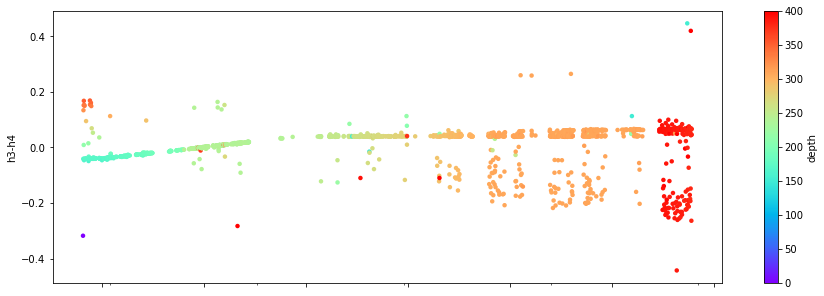

In [264]:
df.plot.scatter(x='h3_arrival', y='h3-h4', marker='o', linewidth=0, c='depth', cmap='rainbow', vmin=0, vmax=400, figsize=(15, 5))

/tmp/ipykernel_2575/2633945209.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


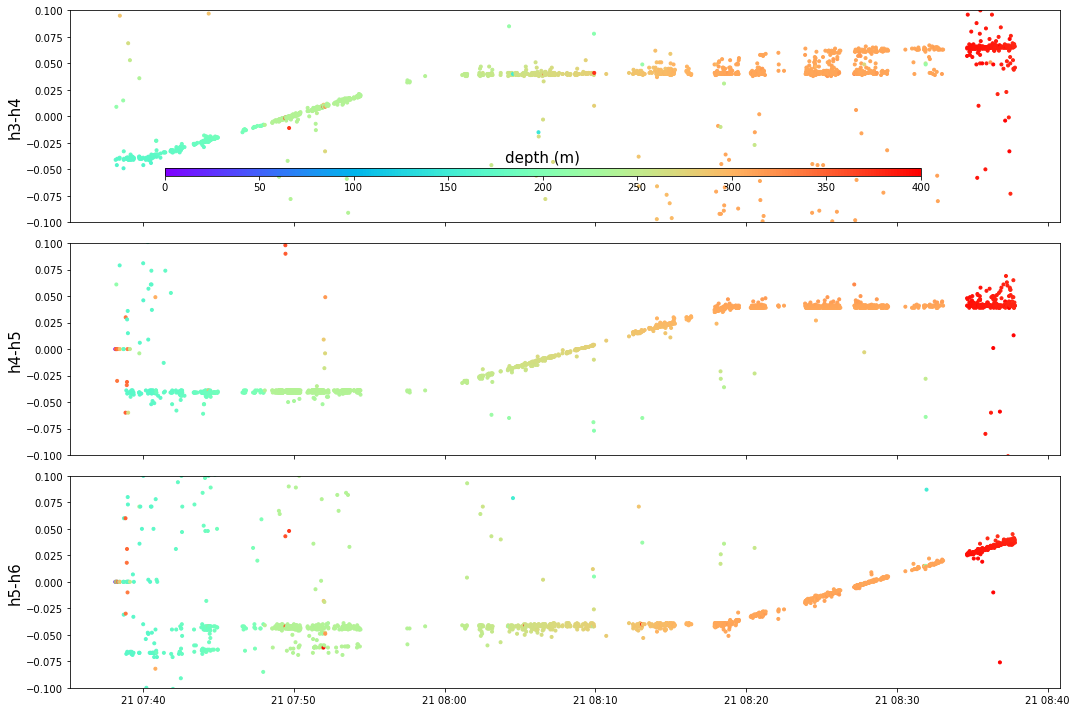

In [265]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True, sharey=True)

pair = 'h3-h4'
axes[0].scatter(x=df.h3_arrival, y=df[pair], marker='.', c=df.depth, cmap='rainbow', vmin=0, vmax=400, )
axes[0].set_ylabel(pair, fontsize=15)

pair = 'h4-h5'
axes[1].scatter(x=df.h3_arrival, y=df[pair], marker='.', c=df.depth, cmap='rainbow', vmin=0, vmax=400, )
axes[1].set_ylabel(pair, fontsize=15)

pair = 'h5-h6'
cbar = axes[2].scatter(x=df.h3_arrival, y=df[pair], marker='.', c=df.depth, cmap='rainbow', vmin=0, vmax=400, )
axes[2].set_ylabel(pair, fontsize=15)

cbarax = fig.add_axes([0.15, 0.75, 0.7, 0.01])
fig.colorbar(cbar, cax=cbarax, orientation='horizontal')
cbarax.set_title('depth (m)', fontsize=15)

axes[0].set_ylim(-0.1, 0.1)
fig.tight_layout()

(-0.1, 0.1)

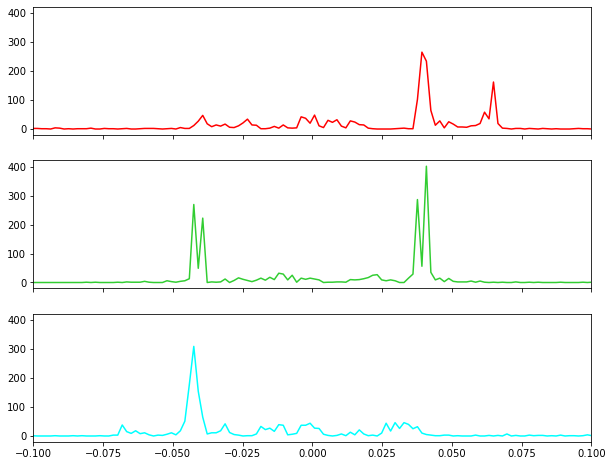

In [266]:
pairs = {}

def hist(a):
    return np.histogram(a, bins=np.linspace(-0.4, 0.4, 500))

h, e = hist(df['h3-h4'].values)
pairs['h3-h4'] = {'h':h, 'e':e}

h, e = hist(df['h4-h5'].values)
pairs['h4-h5'] = {'h':h, 'e':e}

h, e = hist(df['h5-h6'].values)
pairs['h5-h6'] = {'h':h, 'e':e}


# h, e = np.histogram(df['h3-h4'].values, bins=np.linspace(-0.4, 0.4, 500))

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

axes[0].plot(pairs['h3-h4']['e'][:-1], pairs['h3-h4']['h'], color='red')
axes[1].plot(pairs['h4-h5']['e'][:-1], pairs['h4-h5']['h'], color='limegreen')
axes[2].plot(pairs['h5-h6']['e'][:-1], pairs['h5-h6']['h'], color='cyan')

axes[0].set_xlim(-0.1, 0.1)

1782.1428571428548

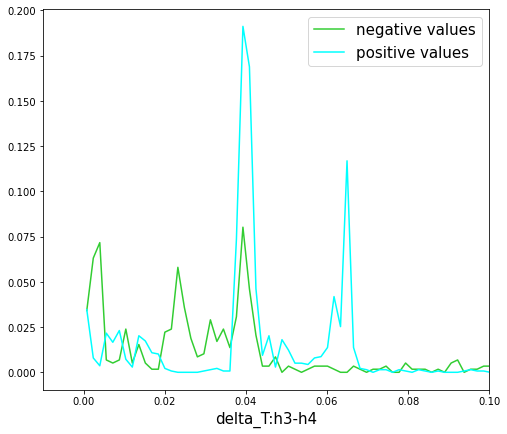

In [267]:
fig, ax = plt.subplots(figsize=(8, 7))

pair = 'h3-h4'

neg_e = pairs[pair]['e'][:250]
neg_h = pairs[pair]['h'][:250]
neg_h = neg_h/neg_h.sum()
ax.plot(neg_e*(-1), neg_h, label='negative values', color='limegreen')

pos_e = pairs[pair]['e'][250:]
pos_h = pairs[pair]['h'][250:]
pos_h = pos_h/pos_h.sum()
ax.plot(pos_e[:-1], pos_h, label='positive values', color='cyan')

ax.set_xlabel('delta_T:'+pair, fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(-0.01, 0.1)

delta_t_pos = pos_e[pos_h.argmax()]
delta_t_neg = neg_e[neg_h.argmax()]
# delta_t = np.mean([delta_t_pos, -delta_t_neg])

delta_depth = 70

h34_v_pos = delta_depth / delta_t_pos
h34_v_neg = -delta_depth / delta_t_neg
h34_v_neg


1647.6415094339618

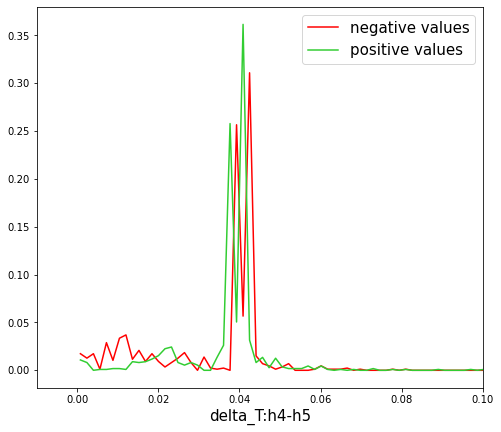

In [268]:
fig, ax = plt.subplots(figsize=(8, 7))

pair = 'h4-h5'

neg_e = pairs[pair]['e'][:250]
neg_h = pairs[pair]['h'][:250]
neg_h = neg_h/neg_h.sum()
ax.plot(neg_e*(-1), neg_h, label='negative values', color='red')

pos_e = pairs[pair]['e'][250:]
pos_h = pairs[pair]['h'][250:]
pos_h = pos_h/pos_h.sum()
ax.plot(pos_e[:-1], pos_h, label='positive values', color='limegreen')

ax.set_xlabel('delta_T:'+pair, fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(-0.01, 0.1)

delta_t_pos = pos_e[pos_h.argmax()]
delta_t_neg = neg_e[neg_h.argmax()]
delta_t = np.mean([delta_t_pos, -delta_t_neg])

delta_depth = 70

h45_v_pos = delta_depth / delta_t_pos
h45_v_neg = -delta_depth / delta_t_neg
h45_v_neg

1647.6415094339618

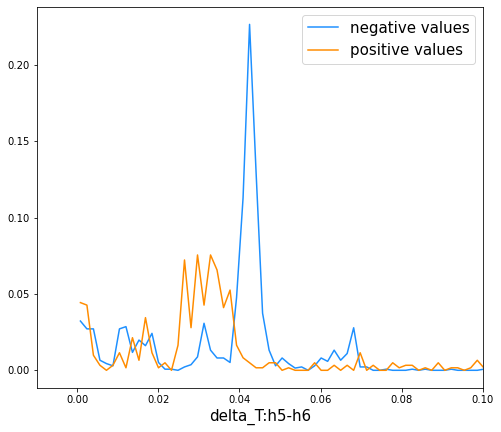

In [269]:
fig, ax = plt.subplots(figsize=(8, 7))

pair = 'h5-h6'

neg_e = pairs[pair]['e'][:250]
neg_h = pairs[pair]['h'][:250]
neg_h = neg_h/neg_h.sum()
ax.plot(neg_e*(-1), neg_h, label='negative values', color='dodgerblue')

pos_e = pairs[pair]['e'][250:]
pos_h = pairs[pair]['h'][250:]
pos_h = pos_h/pos_h.sum()
ax.plot(pos_e[:-1], pos_h, label='positive values', color='darkorange')

ax.set_xlabel('delta_T:'+pair, fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(-0.01, 0.1)

delta_t_pos = pos_e[pos_h.argmax()]
delta_t_neg = neg_e[neg_h.argmax()]
delta_t = np.mean([delta_t_pos, -delta_t_neg])

delta_depth = 70

h56_v_pos = delta_depth / delta_t_pos
h56_v_neg = -delta_depth / delta_t_neg
h56_v_neg

In [270]:
print('h3-h4 velocity positive:', np.round(h34_v_pos, 3))
print('h3-h4 velocity negative:', np.round(h34_v_neg, 3))
print('h4-h5 velocity positive:', np.round(h45_v_pos, 3))
print('h4-h5 velocity negative:', np.round(h45_v_neg, 3))
print('h5-h6 velocity positive:', np.round(h56_v_pos, 3))
print('h5-h6 velocity negative:', np.round(h56_v_neg, 3))
print('mean velocity:', np.round(np.mean([h34_v_pos
                                         ,h34_v_neg
                                         ,h45_v_pos
                                         ,h45_v_neg
                                         ,h56_v_pos
                                         ,h56_v_neg]), 3)
      , '+/-', np.round(np.std([h34_v_pos
                             ,h34_v_neg
                             ,h45_v_pos
                             ,h45_v_neg
                             ,h56_v_pos
                             ,h56_v_neg])/np.sqrt(6), 3))

h3-h4 velocity positive: 1782.143
h3-h4 velocity negative: 1782.143
h4-h5 velocity positive: 1712.255
h4-h5 velocity negative: 1647.642
h5-h6 velocity positive: 2360.135
h5-h6 velocity negative: 1647.642
mean velocity: 1821.993 +/- 100.776


[]

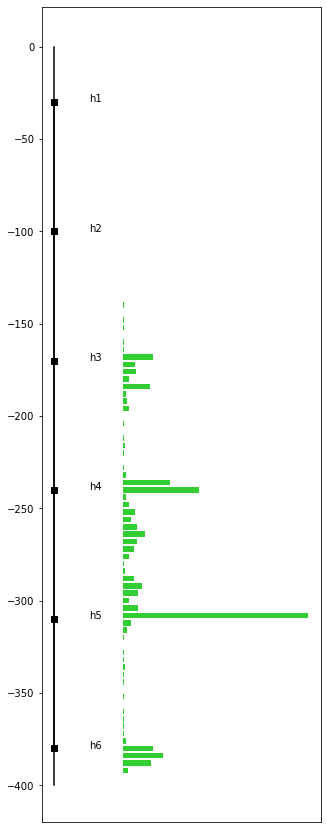

In [271]:

hydrophones = {'h1':{'depth':30, 'idx':0}
              ,'h2':{'depth':100, 'idx':1}
              ,'h3':{'depth':170, 'idx':2}
              ,'h4':{'depth':240, 'idx':3}
              ,'h5':{'depth':310, 'idx':4}
              ,'h6':{'depth':380, 'idx':5}}

x = np.zeros(6)
h_depths = -1 * np.array([hydrophones[h]['depth'] for h in hydrophones])

fig, ax = plt.subplots(figsize=(5, 15))

# plot hydrophone cable axis
ax.plot((0, 0), (0, -400), color='black')
ax.plot(x, h_depths, marker='s', color='black')

# ax.set_yticks(h_depths)

# make a label for each hydrophone
for n, h in enumerate(h_depths):
    ax.text(s='h{n}'.format(n=n+1), x=0.005, y=h)

# h, e = np.histogram(iet.df.depth, bins=np.arange(0, 400, 4))
h, e = np.histogram(df.depth, bins=np.arange(0, 400, 4))

# ax2 = ax.twinx()
ax.barh(-e[:-1], width=h/(10*h.sum()), left=0.01, height=(3,)*h.shape[0], color='limegreen')

# ax.plot((-10, 10), (-150, -150))
ax.set_xticks([])

Text(0, 0.5, 'Depth (m)')

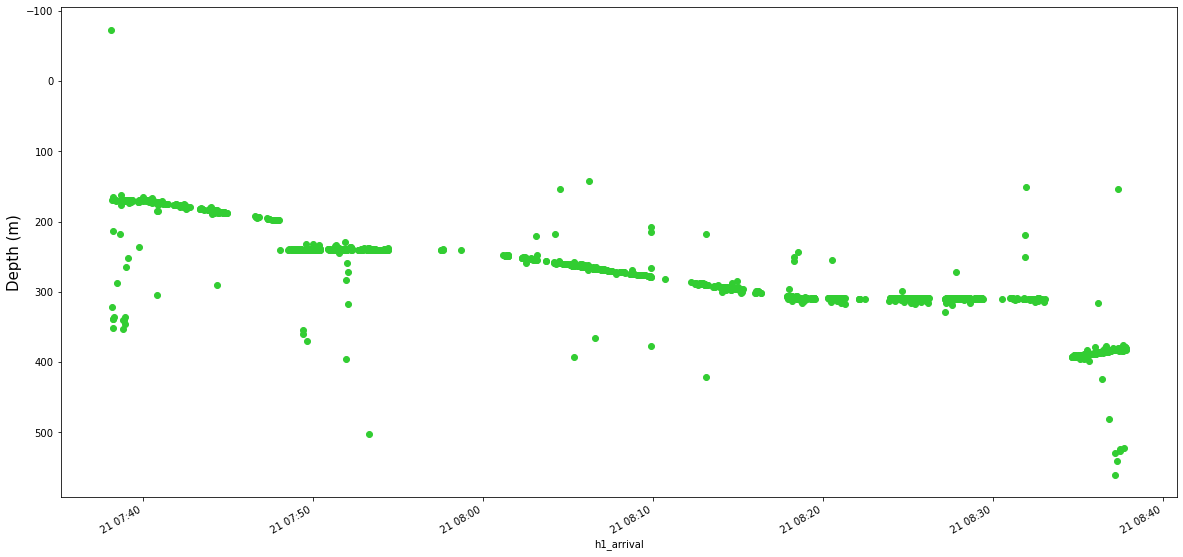

In [272]:
fig, ax = plt.subplots(figsize=(20, 10))
# iet.df.set_index('event_times').depth.plot(ax=ax, color='limegreen', marker='o', linewidth=0)
# df.set_index('event_times').depth.plot(ax=ax, color='limegreen', marker='o', linewidth=0)
df.set_index('h1_arrival').depth.plot(ax=ax, color='limegreen', marker='o', linewidth=0)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)', fontsize=15)

# x = iet.df.event_times[0]
# x = df.h1_arrival
# ax.plot((x, x), (0, 400), color='black')
# ax.plot((x,)*6, -h_depths, marker='s', color='black')

(-0.1, 0.1)

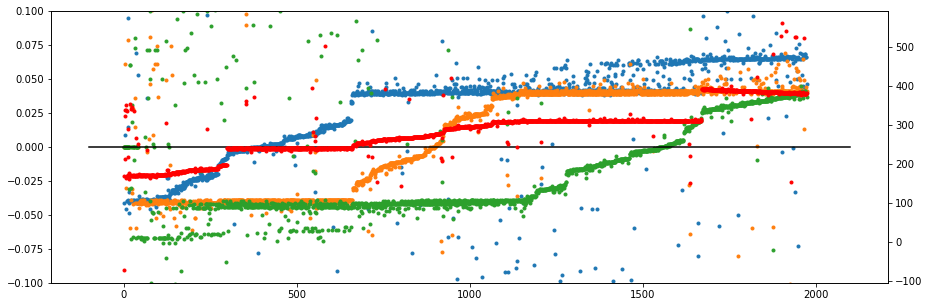

In [273]:
fig, ax = plt.subplots(figsize=(15, 5))

# df.set_index('h1_arrival', inplace=True)
(df.h3_arrival - df.h4_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
(df.h4_arrival - df.h5_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
(df.h5_arrival - df.h6_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
ax.plot([-100, 2100], [0,0], color='black')

ax2 = ax.twinx()
df.depth.plot(marker='.', linewidth=0, ax=ax2, color='red')

ax.set_ylim(-0.1, 0.1)

<AxesSubplot:>

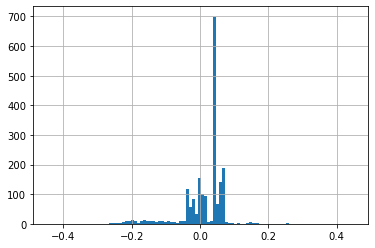

In [274]:
df['h3-h4'].hist(bins=100)

<AxesSubplot:xlabel='h3_arrival'>

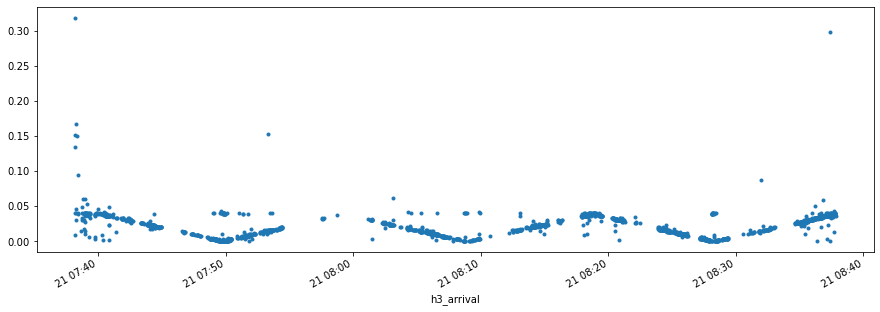

In [275]:
df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, -9999).abs().min(axis=1).plot(figsize=(15, 5), marker='.', linewidth=0)

In [276]:
df

,depth,h1_arrival,h2_arrival,h3_arrival,h4_arrival,h5_arrival,h6_arrival,h3-h4,h4-h5,h5-h6,depth2,h4-h3,h5-h4,h6-h5
0,-73.250,2019-05-21 07:38:10.107000+00:00,2019-05-21 07:38:10.046000+00:00,2019-05-21 07:38:10.188000+00:00,2019-05-21 07:38:10.506000+00:00,2019-05-21 07:38:10.506000+00:00,2019-05-21 07:38:10.506000+00:00,-0.318,0.000,0.000,-243.250,0.318,0.000,0.000
1,169.125,2019-05-21 07:38:11.524000+00:00,2019-05-21 07:38:11.495000+00:00,2019-05-21 07:38:11.524000+00:00,2019-05-21 07:38:11.565000+00:00,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,-0.041,0.162,0.000,-0.875,0.041,-0.162,0.000
2,322.250,2019-05-21 07:38:12.736000+00:00,2019-05-21 07:38:12.634000+00:00,2019-05-21 07:38:12.737000+00:00,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.134,0.000,0.000,-82.250,-0.134,0.000,0.000
3,338.000,2019-05-21 07:38:14.011000+00:00,2019-05-21 07:38:14.112000+00:00,2019-05-21 07:38:14.125000+00:00,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.152,0.000,0.000,-98.000,-0.152,0.000,0.000
4,212.875,2019-05-21 07:38:14.326000+00:00,2019-05-21 07:38:14.323000+00:00,2019-05-21 07:38:14.323000+00:00,2019-05-21 07:38:14.314000+00:00,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.009,0.061,0.000,27.125,-0.009,-0.061,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,379.125,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.437000+00:00,2019-05-21 08:37:46.369000+00:00,2019-05-21 08:37:46.328000+00:00,2019-05-21 08:37:46.287000+00:00,0.068,0.041,0.041,-0.875,-0.068,-0.041,-0.041
1971,380.000,2019-05-21 08:37:46.890000+00:00,2019-05-21 08:37:46.890000+00:00,2019-05-21 08:37:47.034000+00:00,2019-05-21 08:37:46.968000+00:00,2019-05-21 08:37:46.927000+00:00,2019-05-21 08:37:46.887000+00:00,0.066,0.041,0.040,0.000,-0.066,-0.041,-0.040
1972,380.000,2019-05-21 08:37:47.862000+00:00,2019-05-21 08:37:47.409000+00:00,2019-05-21 08:37:47.378000+00:00,2019-05-21 08:37:47.642000+00:00,2019-05-21 08:37:47.598000+00:00,2019-05-21 08:37:47.558000+00:00,-0.264,0.044,0.040,0.000,0.264,-0.044,-0.040
1973,380.875,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.658000+00:00,2019-05-21 08:37:48.592000+00:00,2019-05-21 08:37:48.551000+00:00,2019-05-21 08:37:48.512000+00:00,0.066,0.041,0.039,0.875,-0.066,-0.041,-0.039


In [277]:
df.columns

Index(['depth', 'h1_arrival', 'h2_arrival', 'h3_arrival', 'h4_arrival',
       'h5_arrival', 'h6_arrival', 'h3-h4', 'h4-h5', 'h5-h6', 'depth2',
       'h4-h3', 'h5-h4', 'h6-h5'],
      dtype='object')

In [278]:
# dt = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).abs().min(axis=1)
dt = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6', 'h4-h3', 'h5-h4', 'h6-h5']].replace(0, 9999).abs().min(axis=1)
# dt = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).min(axis=1)


# dz_a = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).abs().idxmin(axis=1).apply(lambda x: hydrophones[x[0:2]]['depth'])
dz_a = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6', 'h4-h3', 'h5-h4', 'h6-h5']].replace(0, 9999).abs().idxmin(axis=1).apply(lambda x: hydrophones[x[0:2]]['depth'])
# dz_a = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).idxmin(axis=1).apply(lambda x: hydrophones[x[0:2]]['depth'])
# dt_sign = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).min(axis=1).apply(lambda x: np.sign(x))
dt_sign = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6', 'h4-h3', 'h5-h4', 'h6-h5']].replace(0, 9999).min(axis=1).apply(lambda x: np.sign(x))

z = dz_a - (35 - 0.5 * dt * 1750 * (dt_sign))
# z = dz_a + (35 - 0.5 * dt * 1750 )

In [279]:
df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, 9999).abs().idxmin(axis=1)

h3_arrival
2019-05-21 07:38:10.188000+00:00    h3-h4
2019-05-21 07:38:11.524000+00:00    h3-h4
2019-05-21 07:38:12.737000+00:00    h3-h4
2019-05-21 07:38:14.125000+00:00    h3-h4
2019-05-21 07:38:14.323000+00:00    h3-h4
                                    ...  
2019-05-21 08:37:46.437000+00:00    h4-h5
2019-05-21 08:37:47.034000+00:00    h5-h6
2019-05-21 08:37:47.378000+00:00    h5-h6
2019-05-21 08:37:48.658000+00:00    h5-h6
2019-05-21 08:37:49.488000+00:00    h5-h6
Length: 1975, dtype: object

In [280]:
colors = {240:'red', 310:'dodgerblue', 170:'limegreen'}

In [281]:
dz_a

h3_arrival
2019-05-21 07:38:10.188000+00:00    170
2019-05-21 07:38:11.524000+00:00    170
2019-05-21 07:38:12.737000+00:00    170
2019-05-21 07:38:14.125000+00:00    170
2019-05-21 07:38:14.323000+00:00    170
                                   ... 
2019-05-21 08:37:46.437000+00:00    240
2019-05-21 08:37:47.034000+00:00    310
2019-05-21 08:37:47.378000+00:00    310
2019-05-21 08:37:48.658000+00:00    310
2019-05-21 08:37:49.488000+00:00    310
Length: 1975, dtype: int64

Text(0, 0.5, 'sign')

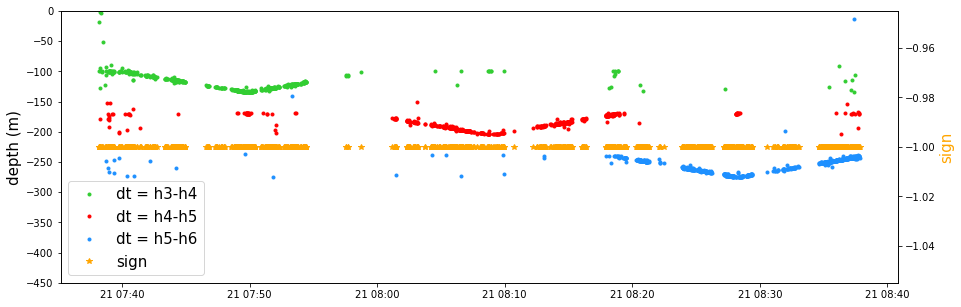

In [282]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot([],[], color='limegreen', marker='.', linewidth=0)
ax.plot([],[], color='red', marker='.', linewidth=0)
ax.plot([],[], color='dodgerblue', marker='.', linewidth=0)
ax.plot([],[], color='orange', marker='*', linewidth=0)
ax.legend(['dt = h3-h4'
         , 'dt = h4-h5'
         , 'dt = h5-h6'
          ,'sign'], fontsize=15)

for t, d, cd in zip(z.index, z, dz_a):
    ax.plot(t, -d, marker='.', linewidth=0, color=colors[cd])
# ax.plot(z.index, -z, marker='.', linewidth=0,)

ax2 = ax.twinx()
ax2.plot(dt_sign, zorder=0, color='orange', marker='*', linewidth=0)

# ax.plot([])

ax.set_ylabel('depth (m)', fontsize=15)

ax.set_ylim(-450, 0)
ax2.set_ylabel('sign', fontsize=15, color='orange')

In [298]:
df_try2 = iet.df.join(df)

In [303]:
first = df_try2.hphone_idx.apply(lambda x: x+'_arrival')

In [323]:
# def pick_min(t1, t2, arrival):
#     top = (t1 - arrival).total_seconds()
#     bottom = (t2 - arrival).total_seconds()
#     return np.min([top, bottom])

# def get_topcolname(h):
#     h = int(h[1]) - 1
#     return 'h' + str(h) + '_arrival'

# def get_bottomcolname(h):
#     h = int(h[1]) + 1
#     return 'h' + str(h) + '_arrival'

# def get_dt(arrival_h):
    
top = df_try2.apply(lambda row: row['h'+ str(int(row.hphone_idx[1]) - 1) + '_arrival'], axis=1)
bottom = df_try2.apply(lambda row: row['h'+ str(int(row.hphone_idx[1]) + 1 if int(row.hphone_idx[1]) < 6 else '5') + '_arrival'], axis=1)
arrival = df_try2.apply(lambda row: row['h'+ str(int(row.hphone_idx[1])) + '_arrival'], axis=1)


arr_top = (arrival - top).apply(lambda x: x.total_seconds())
arr_bot = (arrival - bottom).apply(lambda x: x.total_seconds())

df_new = pd.DataFrame({
    'top':top
    ,'bottom':bottom
    ,'arrival':arrival
    ,'arr_top':arr_top
    ,'arr_bot':arr_bot
    ,'arrival_hphone':df_try2.hphone_idx
})

array([[<AxesSubplot:title={'center':'arr_top'}>,
        <AxesSubplot:title={'center':'arr_bot'}>]], dtype=object)

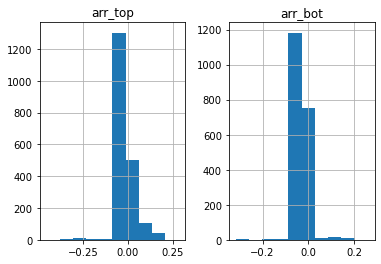

In [366]:
df_new[['arr_top', 'arr_bot']].hist()

<AxesSubplot:>

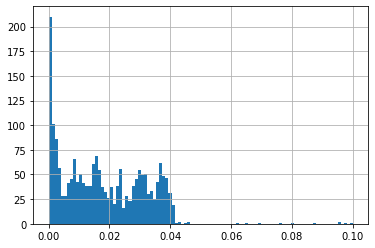

In [378]:
df_new[['arr_top', 'arr_bot']].abs().min(axis=1).hist(bins=np.linspace(0, 0.1, 100))

In [374]:
df_new['rel_depth'] = df_new.apply(lambda x: 35 + 0.5 * x[['arr_top', 'arr_bot']].abs().min() * 1750, axis=1)

In [375]:
df_new['hphone_depth'] = df_new.arrival_hphone.apply(lambda x: hydrophones[x]['depth'])
df_new['true_depth'] = df_new['rel_depth'] + df_new['hphone_depth']

(-500.0, 0.0)

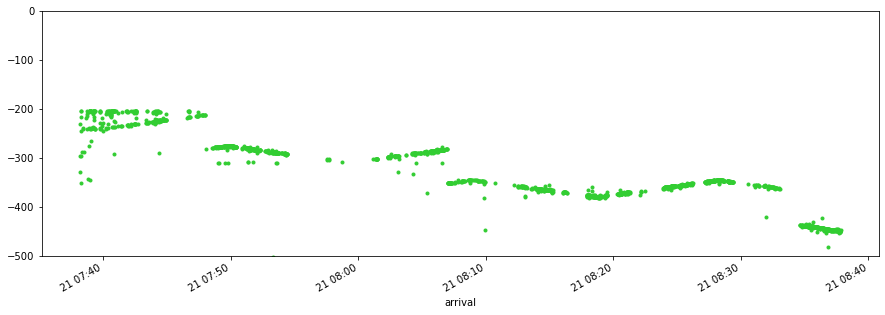

In [376]:
fig, ax = plt.subplots(figsize=(15, 5))
(-1*df_new.set_index('arrival').true_depth).plot(ax=ax, marker='.', linewidth=0, color='limegreen')
ax.set_ylim(-500, 0)

In [377]:
df_new.rel_depth.apply(lambda x: np.sign(x)).unique()

array([1.])

[1 2 0 3]


(<Figure size 1080x2160 with 12 Axes>,
 array([<AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>], dtype=object))

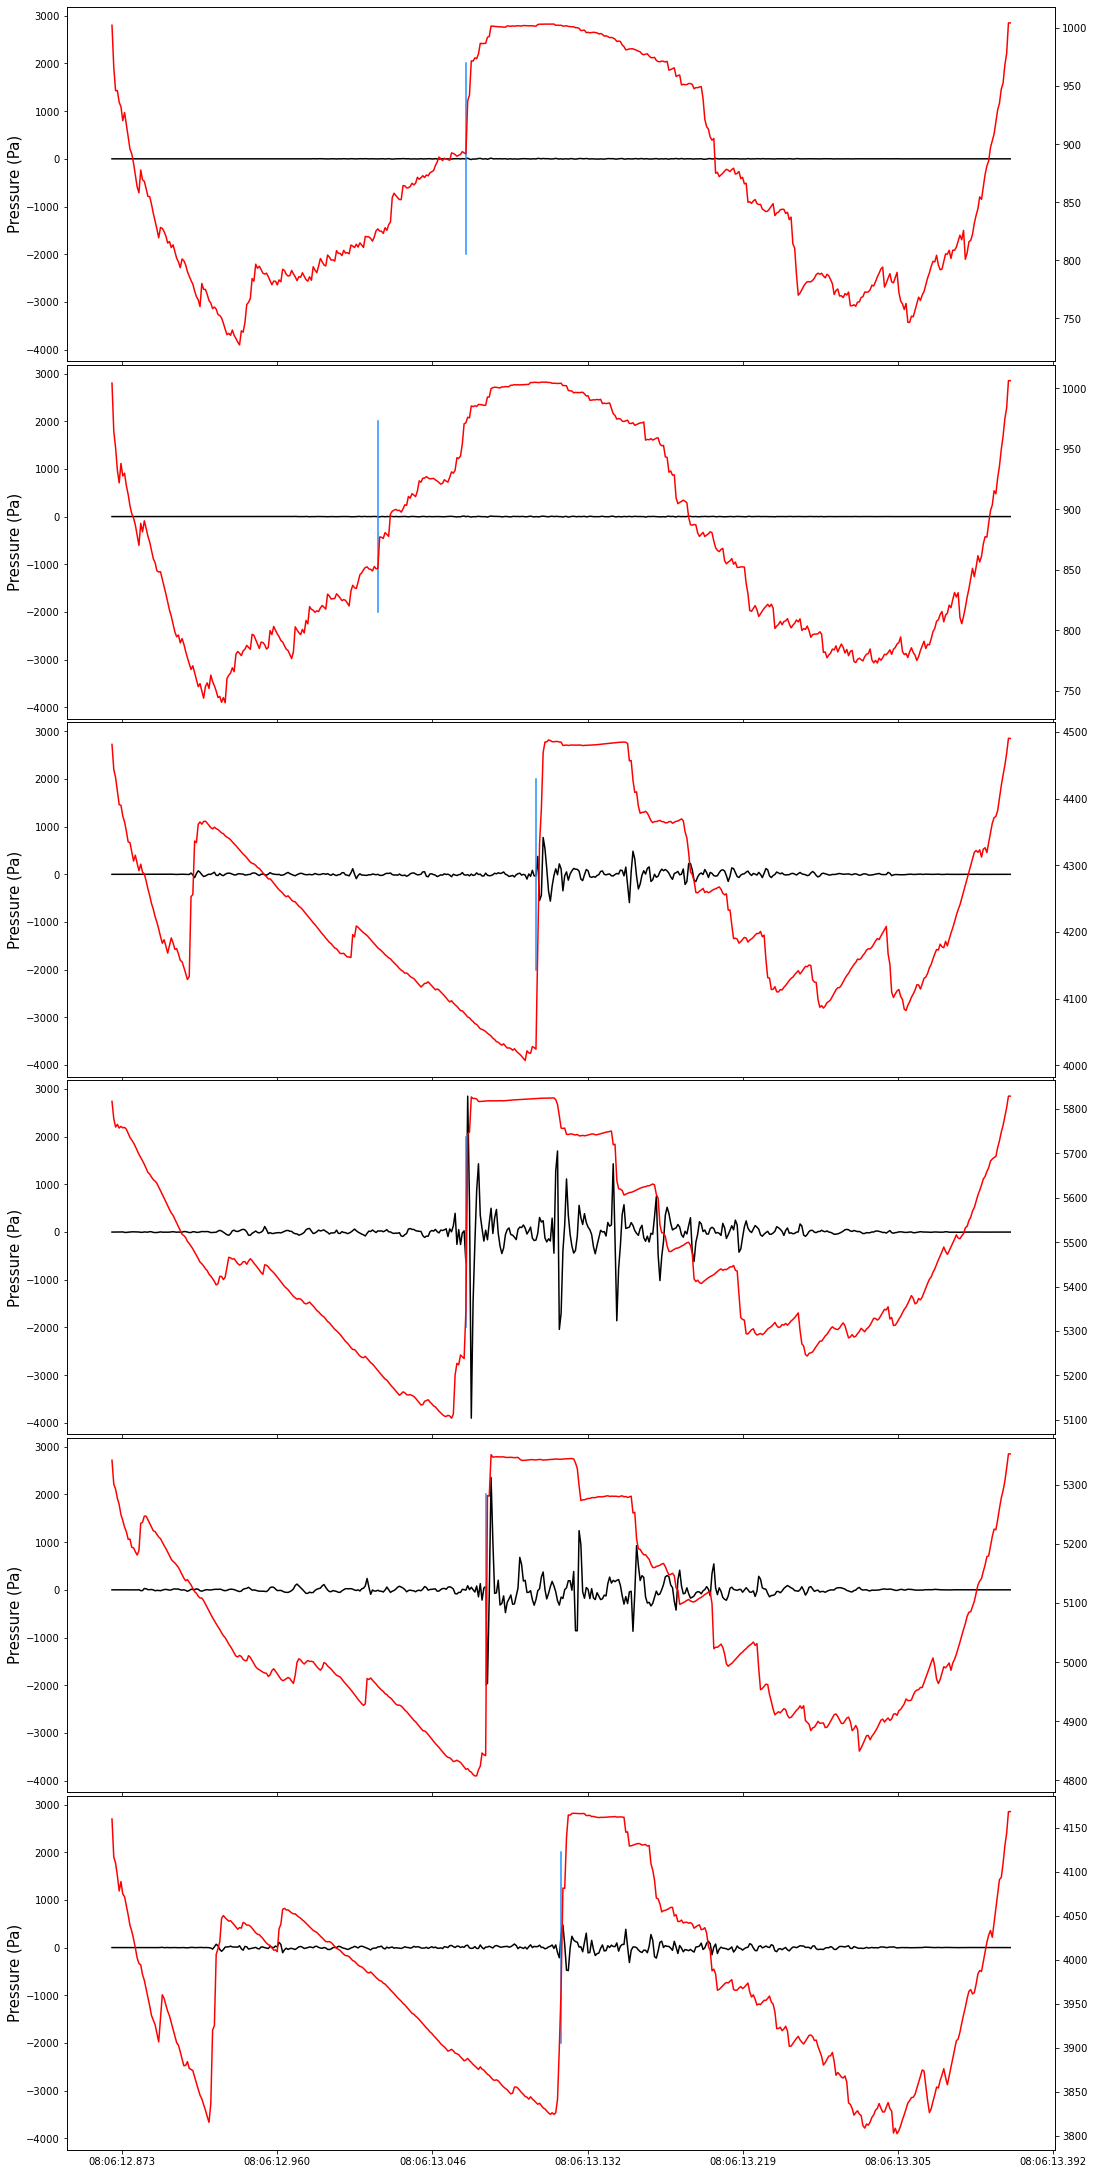

In [391]:
e = Event(id=800, velocity_model=1750)
print(np.argsort(e.aic_t[2:]))
e.plot('waveforms')

<AxesSubplot:>

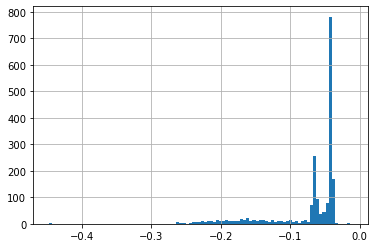

In [294]:
df[['h3-h4', 'h4-h5', 'h5-h6', 'h4-h3', 'h5-h4', 'h6-h5']].replace(0, 9999).min(axis=1).hist(bins=100)

<AxesSubplot:xlabel='h3_arrival'>

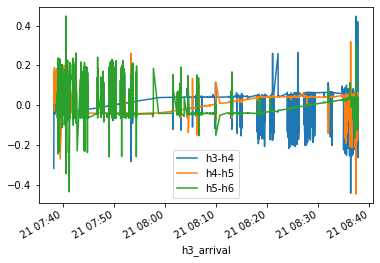

In [257]:
df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].plot()

In [198]:
e = Event(id=750, velocity_model=1750)

(<Figure size 360x1080 with 1 Axes>, <AxesSubplot:>)

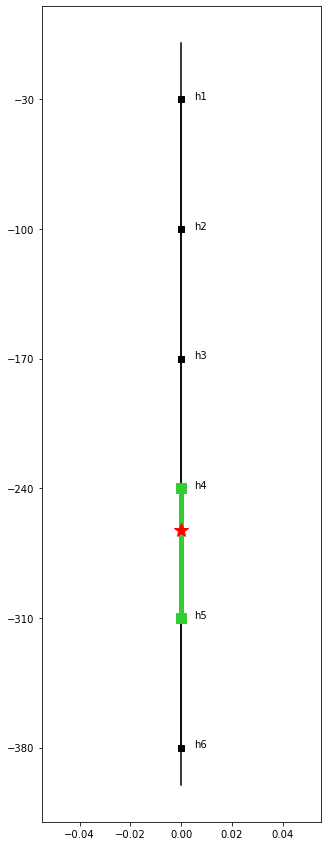

In [199]:
e.plot('event depth')

In [69]:
dz_a = df.set_index('h3_arrival')[['h3-h4', 'h4-h5', 'h5-h6']].abs().idxmin(axis=1).apply(lambda x: hydrophones[x[0:2]]['depth'])

In [38]:
df['depth2'] = df.apply(lambda row: 35 - (0.5)*row[['h3-h4', 'h4-h5', 'h5-h6']].replace(0, -9999).abs().min(axis=0)*(1750), axis=1)

(-0.1, 0.1)

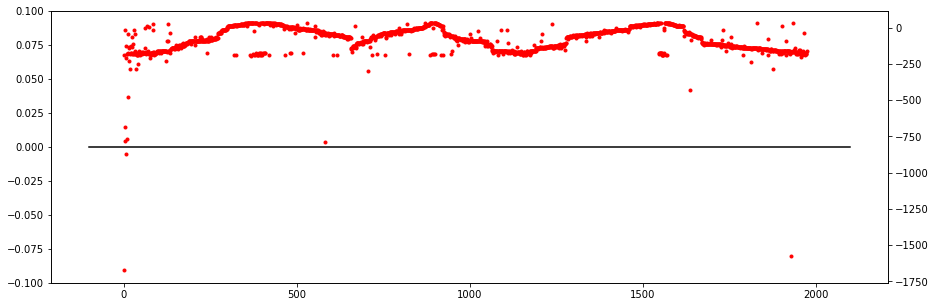

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))

# df.set_index('h1_arrival', inplace=True)
# (df.h3_arrival - df.h4_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
# (df.h4_arrival - df.h5_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
# (df.h5_arrival - df.h6_arrival).apply(lambda x: x.total_seconds()).plot(marker='.', linewidth=0, ax=ax)
ax.plot([-100, 2100], [0,0], color='black')

ax2 = ax.twinx()
df.depth2.plot(marker='.', linewidth=0, ax=ax2, color='red')

ax.set_ylim(-0.1, 0.1)

<AxesSubplot:>

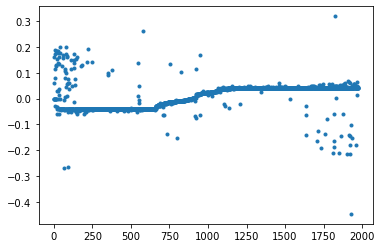

<AxesSubplot:>

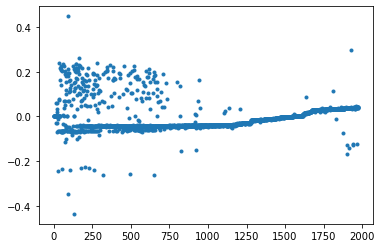

<AxesSubplot:>

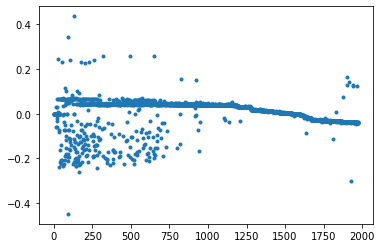

In [22]:
event_ids = [i for i in iet.df.index]

In [23]:
e = Event(id=75, velocity_model=1750)
import matplotlib.dates as dates
times = np.array(dates.num2date(np.array(e.aic_t)))
print(times)
print(e.first_hydrophone_id)
ta = times[hydrophones[e.first_hydrophone_id]['idx']]
print(ta)
tdiff = np.array([t.total_seconds() for t in (ta - times)])
print(tdiff)
print(np.nonzero(tdiff))
# print(np.abs(tdiff) > 0.04)
# e.plot('waveforms')

{0, 1, 2, 3, 4, 5}.difference(set(np.nonzero(tdiff)[0]))

[datetime.datetime(2019, 5, 21, 7, 40, 1, 417000, tzinfo=datetime.timezone.utc)
 datetime.datetime(2019, 5, 21, 7, 40, 1, 131000, tzinfo=datetime.timezone.utc)
 datetime.datetime(2019, 5, 21, 7, 40, 1, 103000, tzinfo=datetime.timezone.utc)
 datetime.datetime(2019, 5, 21, 7, 40, 1, 142000, tzinfo=datetime.timezone.utc)
 datetime.datetime(2019, 5, 21, 7, 40, 1, 61000, tzinfo=datetime.timezone.utc)
 datetime.datetime(2019, 5, 21, 7, 40, 1, 101000, tzinfo=datetime.timezone.utc)]
h3
2019-05-21 07:40:01.103000+00:00
[-0.314 -0.028  0.    -0.039  0.042  0.002]
(array([0, 1, 3, 4, 5]),)


{2}

In [24]:
iet.df.iloc[1250]

index                                                408
event_times (mpl)                           18037.347917
event_times (abs)            2019-05-21T08:21:00.019000Z
hphone_idx                                            h5
ones                                                   1
event_times             2019-05-21 08:21:00.019000+00:00
p_arrival_hphone_idx    2019-05-21 08:21:00.004000+00:00
Name: 1250, dtype: object